In [71]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('../data/used_mobile_phone.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None


,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [73]:
df['month'] = df['create_date'].apply(lambda x: x[:7])
df['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

<AxesSubplot:>

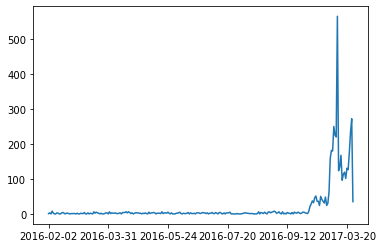

In [74]:
#일별 거래량 계산
df_day = df['create_date'].apply(lambda x:x[:10])
df_day.value_counts().sort_index(ascending=True).plot()

<AxesSubplot:>

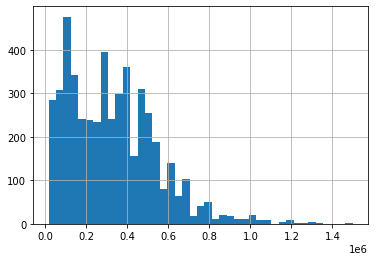

In [75]:
#가격 분포
df['price'].hist(bins='auto')

In [76]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,month
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04


<AxesSubplot:>

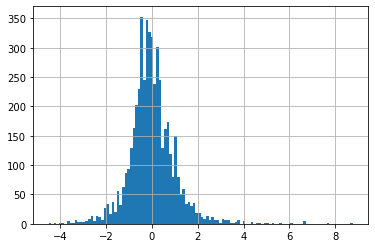

In [77]:
df_price_mean = df.groupby('phone_model')['price'].transform(lambda x:np.mean(x))
df_price_std = df.groupby('phone_model')['price'].transform(lambda x:np.std(x))

#z-score을 이용하여 기종별 평균에 비해 얼마나 높고 낮은지 분석 z-score = (score-mean) / std

df_z_score = (df['price'] - df_price_mean) / df_price_std
df_z_score.hist(bins='auto')

In [78]:
#피어슨 상관계수로 price와 factory_price의 상관관계 찾기
corr = df.corr(method='pearson')
corr['price']

price            1.000000
factory_price    0.339306
price_index      0.025516
Name: price, dtype: float64

In [79]:
#핸드폰 종류 개수
len(df['phone_model'].unique())

64

In [80]:
df.head()
df['month'] = df['create_date'].apply(lambda x:x[:7])
df = df[['price', 'phone_model', 'factory_price', 'price_index', 'month', 'maker']]
#모델학습 전 one-hot encoding
df = pd.get_dummies(df)
df.head()

,price,factory_price,price_index,phone_model_g pro2 32gb,phone_model_g3 cat.6 32gb,phone_model_g4 32gb,phone_model_galaxy a7 2016 16gb,phone_model_galaxy a8 2016 32gb,phone_model_galaxy alpha 32gb,phone_model_galaxy folder 8gb,...,month_2016-10,month_2017-03,maker_apple,maker_huawei,maker_lg,maker_pantech,maker_samsung,maker_sky,maker_sony,maker_tg
0,550000.0,924000,95.96,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,380000.0,979000,103.05,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,300000.0,854000,103.05,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,290000.0,836000,95.96,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,280000.0,396000,102.59,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
#랜덤 포레스트 모델을 이용하여 모델 학습 및 가격 예측
from sklearn.model_selection import train_test_split    #test, train 데이터 나누기 위하여
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

##test, train 데이터 분류
x = df.loc[:, df.columns != 'price'].values
y=  df['price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#모델 학습
forest_model = RandomForestRegressor(n_estimators=1000, criterion='mse')
forest_model.fit(x_train, y_train)
#모델 예측
y_train_pred = forest_model.predict(x_train)
y_test_pred = forest_model.predict(x_test)
#모델 평가는 mse, r2_score
print('MSE(Mean squared Error)s train is %.3f test is %.3f' % (
    mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('mse r2 train is %.3f test is %.3f' % (
    r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

/Users/hanjihun/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


MSE(Mean squared Error)s train is 10428497356.506 test is 15489055313.717
mse r2 train is 0.780 test is 0.662


> mse = mean squared error으로 추측값이 정확한지 판단하는 지표,

> r2_score = result_score으로 1에 가까울수록 좋은 회귀모델

<BarContainer object of 84 artists>

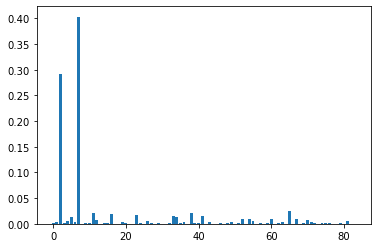

In [82]:
#피처의 중요도 분석
#one-hot encoding을 완료한 df의 columns은 84개, importance는 이 columns에 대한 중요도
importance = forest_model.feature_importances_
indices = np.argsort(importance[::-1])  #인덱스를 역순으로 정렬
x_label = np.arange(x.shape[1])
plt.bar(x_label, importance[indices])

In [83]:
#importance의 top10을 column 이름과 함께 출력
columns_label = df.columns.drop('price').tolist()
feature = list(zip(columns_label, importance))
sorted(feature, key=lambda tup : tup[1], reverse=True)[:10]

[('factory_price', 0.4033742409570839),
 ('maker_apple', 0.2914089637699918),
 ('phone_model_iphone se 64gb', 0.02480422013010434),
 ('phone_model_galaxy s3 3g 8gb', 0.02122622125724977),
 ('price_index', 0.02040314579564056),
 ('phone_model_galaxy s4 32gb', 0.01928652198848301),
 ('maker_samsung', 0.016332837076565746),
 ('month_2017-03', 0.015611477004679287),
 ('phone_model_iphone 6 128gb', 0.014966884608585857),
 ('phone_model_galaxy s7 edge 32gb', 0.013005206185262184)]

In [84]:
#시간 피처중 Importance가 높은 순대로 출력
for sorted_feature in sorted(feature, key=lambda tup: tup[1], reverse=True):
    if "month" in sorted_feature[0]: 
        print(sorted_feature)

('month_2017-03', 0.015611477004679287)
('month_2016-05', 0.009762759211407004)
('month_2016-09', 0.008340311050240313)
('month_2016-04', 0.006591422694658711)
('month_2016-10', 0.00633233935371773)
('month_2016-06', 0.0037878143521969544)
('month_2016-08', 0.003375284066607577)
('month_2016-07', 0.0020604049938046927)
('month_2016-03', 0.0019095564160483594)
('month_2016-02', 0.000915802787633919)


In [61]:
df.head()

,price,factory_price,price_index,phone_model_g pro2 32gb,phone_model_g3 cat.6 32gb,phone_model_g4 32gb,phone_model_galaxy a7 2016 16gb,phone_model_galaxy a8 2016 32gb,phone_model_galaxy alpha 32gb,phone_model_galaxy folder 8gb,...,month_2016-10,month_2017-03,maker_apple,maker_huawei,maker_lg,maker_pantech,maker_samsung,maker_sky,maker_sony,maker_tg
0,550000.0,924000,95.96,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,380000.0,979000,103.05,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,300000.0,854000,103.05,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,290000.0,836000,95.96,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,280000.0,396000,102.59,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [149]:
df = pd.read_csv('../data/used_mobile_phone.csv')
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


#### 피처 엔지니어링

In [150]:
#create_time 피처를 분석하기위해 unixtime으로 변환
from datetime import datetime
import time

#str타입을 unixtime 타입으로 바꾸어주는 함수
def date_to_unixtime(date_str):
    return time.mktime(datetime.strptime(date_str, '%Y-%m-%d').timetuple())
    #timetuple -> struct_time으로 변환 후 unixtime으로 바꾸어주는 함수 mktime을 적용

In [151]:
df['create_unixtime'] = df['create_date'].apply(lambda x: date_to_unixtime(x[:10]))
#min-max scaling
df['create_time_score'] = (df['create_unixtime'] - df['create_unixtime'].min()) / (df['create_unixtime'].max() - df['create_unixtime'].min())
df[['create_date', 'create_unixtime', 'create_time_score']].head()

,create_date,create_unixtime,create_time_score
0,2017-03-19 4 35 00 PM,1.489849e+09,0.985612
1,2016-10-26 12 08 00 PM,1.477408e+09,0.640288
2,2016-10-25 12 52 00 PM,1.477321e+09,0.637890
3,2017-03-23 11 14 00 PM,1.490195e+09,0.995204
4,2016-04-11 7 35 00 PM,1.460300e+09,0.165468


> min-max scaling -> (x-min(x)) / (max(x) - min(x)) : 0~1의 값으로 1에 가까울수록 큰값임(최근에 작성한 게시물을 의미)

In [152]:
#phone_model 전처리
df['phone_model_storage'] = df['phone_model'].apply(lambda x: x.split(" ")[-1])
df['phone_model_name'] = df['phone_model'].apply(lambda x: ' '.join(x.split(" ")[:-1]))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd2338e9df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd2338fa3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd2338e9b50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd2338fa970>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2338fac40>,
 'means': []}

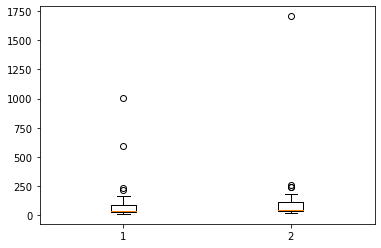

In [153]:
#boxplot으로 피처 엔지니어링 이전과 이후의 분포 차이 시각화
model_counts = df['phone_model'].value_counts()
model_detail_counts = df['phone_model_name'].value_counts()
data = [model_counts, model_detail_counts]
ax = plt.figure().add_subplot(111)
ax.boxplot(data)

> 분포가 안정적으로 변했다.

> 기종별 가격의 분포(정규분포)로 물건의 상태를 판단한다. 상위 5%면 상태가 좋음, 하위 5%면 상태가 나쁨 그 외에는 보통

upper zscore is -1.397 
lower zscore is 1.667 


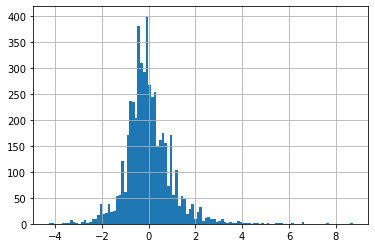

In [154]:
#z-score으로 정규분포 구하기
df['zscore'] = df.groupby('phone_model_name')['price'].transform(lambda x:(x-x.mean())/x.std())
df['zscore'].hist(bins='auto')

#상위, 하위 5% 구하기
upper_zscore = df['zscore'].quantile(0.05)
lower_zscore = df['zscore'].quantile(0.95)

print('upper zscore is %.3f ' % upper_zscore)
print('lower zscore is %.3f ' % lower_zscore)

In [155]:
#위의 zscore으로 price_level 나누기 상위 5%는 2, 하위 5%는 0, 그 사이는 1

def get_price_level(price, lower, upper):
    if price < upper:
        return 2
    elif price > lower:
        return 0
    else:
        return 1

df['price_level'] = df['zscore'].transform(lambda x:get_price_level(x, lower_zscore, upper_zscore))
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime,create_time_score,phone_model_storage,phone_model_name,zscore,price_level
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,1.489849e+09,0.985612,64gb,iphone 6,0.910563,1
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09,0.640288,32gb,galaxy s6 edge,1.003699,1
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09,0.637890,32gb,galaxy s6,0.669017,1
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,1.490195e+09,0.995204,32gb,lg g5,-0.330426,1
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,1.460300e+09,0.165468,32gb,lg u,1.014392,1


In [156]:
#텍스트 전처리
import pickle

#불용어 read
with open('../data/used_mobile_phone_stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)   #rb = read binary, wb = write binary

stopwords[:5]

['거래', '입니', '판매', '아이폰', '갤럭시']

> pickle : 텍스트 데이터를 파이썬 객체로, binary형식으로 저장하는 것

In [157]:
df['text']

0       아이폰6플러스 블랙+애플라이트 64기가 팝니다  아이폰6플러스 블랙+애플라이트 64...
1       갤럭시s6엣지 32기가 팝니다 직거래  갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...
2       갤럭시s6 풀박스로 팝니다~~~ 새상품급  실기스조차 없어요  직접거래 구매한지 1...
3       sk  g5 티탄 폰 단품판매합니다  직접거래 sk g5 티탄 폰 단품판매합니다 올...
4        sony 엑스페리아 c5 ultra e5506 16gb  미사용 새제품 팝니다 1...
                              ...                        
4946    미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...
4947    미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...
4948    아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7  917,91...
4949    미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...
4950     팝니다  아이폰 7 128gb 제트블랙 북미판  카메라 무음, 국내리퍼 가능  1...
Name: text, Length: 4951, dtype: object

In [158]:
# 1. 특수문자 제거(+하고 , 제외) 2. 숫자 제거   
def text_cleaning(text):
    return ''.join(i for i in text if i.isalpha() or i == '+' or i == ',')

#stopword에 없는 형태소만 추출하는 함수
from konlpy.tag import Okt

def get_pos(x):
    tagger = Okt()
    poses = tagger.pos(x)
    return [pos[0] for pos in poses if pos[0] not in stopwords]

In [96]:
df['text'] = df['text'].apply(lambda x: text_cleaning(x))
result = get_pos(df['text'][0])

In [28]:
result[:10]

['+', '애플', '라이트', '팝니다', '+', '애플', '라이트', '팝니다', '+', '애플']

In [97]:
from collections import Counter

# get_pos 함수를 모든 텍스트 데이터에 적용하여 형태소 말뭉치를 추출합니다.
corpus = sum(df['text'].apply(lambda x: get_pos(x)).tolist(), [])

# 추출된 형태소 말뭉치에서 가장 많이 등장한 형태소 2500개를 추출합니다.
counter = Counter(corpus)
common_words = [key for key, _ in counter.most_common(2500)]
common_words

KeyboardInterrupt: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 빈출 형태소를 제외한 모든 형태소를 제거하는 함수를 정의합니다.
def get_common_pos(x):
    tagger = Okt()
    poses = tagger.pos(x)
    return [pos[0] for pos in poses if pos[0] in common_words]

# 1:3:1 비율로 랜덤 샘플링을 수행합니다.
negative_random = df[df['price_level']==0].sample(100, random_state=30)
neutral_random = df[df['price_level']==1].sample(300, random_state=30)
positive_random = df[df['price_level']==2].sample(100, random_state=30)

# 샘플링 완료된 데이터셋을 정의합니다.
df_sample = negative_random.append(neutral_random).append(positive_random)

# TF-IDF를 수행하여 피처를 변환합니다.
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_common_pos(x))
X = index_vectorizer.fit_transform(df_sample['text'].tolist())
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

# 감성 분류를 위한 학습 데이터셋을 정의합니다.
y = df_sample['price_level']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)
print(x_train.shape)
print(x_test.shape)

/var/folders/y6/p039ghpx4kl3tg5t_shd2dzm0000gn/T/ipykernel_56512/212910549.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample = negative_random.append(neutral_random).append(positive_random)
/var/folders/y6/p039ghpx4kl3tg5t_shd2dzm0000gn/T/ipykernel_56512/212910549.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample = negative_random.append(neutral_random).append(positive_random)


(400, 2179)
(100, 2179)


비선형 SVM 모델로 학습 후 평가

>선형으로 분류가 되지 않는 데이터를 데이터로 적용할 수 있음

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#SVM모델에는 커널 함수를 적용해야 한다. 광범위하게 사용되는 것은 'rbf'
#C값은 클수록 마진과 데이터 오분류의 갯수가 커지고, 작을수록 오류가 적어지고 마진값도 적어진다
svm = SVC(kernel='rbf', C=10.0, random_state=0,  gamma=0.10)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
#accuracy score
print('accuracy score is %.3f ' % accuracy_score(y_test, y_pred))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred)
print(confmat)

accuracy score is 0.134 
[[0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [40]:
x_train

<400x2179 sparse matrix of type '<class 'numpy.float64'>'
	with 16865 stored elements in Compressed Sparse Row format>

In [100]:
X = index_vectorizer.transform(df['text'].tolist())
X = tfidf_vectorizer.transform(X)
df['product_status'] = pd.Series(svm.predict(X))
df['product_status']

ValueError: X has 2179 features, but SVC is expecting 84 features as input.

In [160]:
#randomforest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = df[['price', 'factory_price', 'maker', 'price_index', 'create_unixtime', 'create_time_score',
        'phone_model_storage', 'phone_model_name']]
df = pd.get_dummies(df, columns=['maker', 'phone_model_storage', 'phone_model_name'])


In [140]:
df.head()

,price,factory_price,price_index,create_unixtime,create_time_score,phone_model,maker_apple,maker_huawei,maker_lg,maker_pantech,...,phone_model_name_lg g5,phone_model_name_lg u,phone_model_name_luna,phone_model_name_nexus 5x,phone_model_name_optimus g,phone_model_name_vega iron2,phone_model_name_vega secret up,phone_model_name_wine smart jazz,phone_model_name_xperia z3,phone_model_name_y6
0,550000.0,924000,95.96,1.489849e+09,0.985612,iphone 6 64gb,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,380000.0,979000,103.05,1.477408e+09,0.640288,galaxy s6 edge 32gb,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,300000.0,854000,103.05,1.477321e+09,0.637890,galaxy s6 32gb,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,290000.0,836000,95.96,1.490195e+09,0.995204,lg g5 32gb,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,280000.0,396000,102.59,1.460300e+09,0.165468,lg u 32gb,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [161]:
x = df.loc[:, df.columns != 'price']
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
random_forest = RandomForestRegressor(n_estimators=1000, criterion='mse')   #criterion = 기준
random_forest.fit(x_train, y_train)

#회귀모델 평가인 mse, r2_score
y_train_pred = random_forest.predict(x_train)
y_test_pred = random_forest.predict(x_test)
print('mean squared error of train data is %.3f' % mean_squared_error(y_train, y_train_pred))
print('mean squared error of test data is %.3f' % mean_squared_error(y_test, y_test_pred))

print('r2 score of train is %.3f' % r2_score(y_train, y_train_pred))
print('r2 score of test is %.3f' % r2_score(y_test, y_test_pred))

/Users/hanjihun/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


mean squared error of train data is 7057914438.217
mean squared error of test data is 14769682875.543
r2 score of train is 0.854
r2 score of test is 0.662


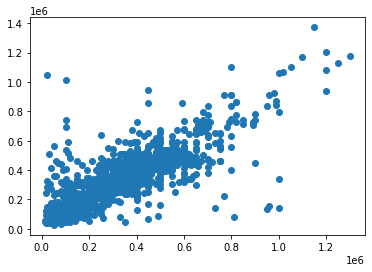

In [162]:
plt.scatter(y_test, y_test_pred)

각 모델의 경우 파라미터에 따라 예측성능이 달라진다 

RandomForest같은 경우에는 n_estimatiors(나뭇가지 수), max_depth와 같은 파라미터 설정이 중요하다.

> 이런 최적의 파라미터를 찾는 방법 중 하나는 Greedy Randomized Serach이다.

In [165]:
#Greddy Randomized Search로 최적의 Parameter 찾기
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
forest = RandomForestRegressor()
optimal_forest = RandomizedSearchCV(estimator = forest, 
                                    param_distributions = random_grid, 
                                    n_iter = 100, 
                                    cv = 3, 
                                    verbose=2,
                                    random_state=42, 
                                    n_jobs = -1)

# RandomizedSearchCV 모델을 학습
X = df.loc[:, df.columns != 'price']
y = df['price']
optimal_forest.fit(X, y)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, n_estimators=800; total time=   3.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, n_estimators=800; total time=   3.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, n_estimators=800; total time=   3.7s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=1000; total time=   4.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=1000; total time=   4.9s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=1000; total time=   5.2s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=1000; total time=   5.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=1000; total time=   5.5s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, n_estimators=600; total time=   2.5s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=